# Face Mask Prediction using U-Net
Task is to predict the mask around the face in a given image.

# Description
In this hands-on project, the goal is to build a deep learning model using U-Net as architecture that will learn
the pixel mapping of the face in an image.

# Dataset
## WIDER Face Dataset

● WIDER FACE dataset is a face detection benchmark dataset, of which images are selected from the
publicly available WIDER dataset.

● This data has 32,203 images and 393,703 faces are labelled with a high degree of variability in scale,
pose and occlusion as depicted in the sample images.

● In this project, we are using 409 images and around 1000 faces for ease of computation.

# Context
We will be using transfer learning on an already trained model. We will use the MobileNet model which is
already trained to detect the face attributes. We will need to train the last 6-7 layers and freeze the remaining
layers to train the model for predicting the mask on the face. To be able to train the MobileNet model, we will
be using the WIDER FACE dataset for various images with a single face and multiple faces.

# Reference

Acknowledgement for the dataset http://mmlab.ie.cuhk.edu.hk/projects/WIDERFace/

Mobile Net paper: https://arxiv.org/pdf/1704.04861.pdf

# Steps
● The images are extracted & saved as images.npy file. We need to load this dataset for processing. “images.npy” contains details about the image and their masks, there is no separate CSV file
for that

● We need to create Features(images) and labels(mask) using the dataset built from images.npy file.

● For training purpose, we will be loading a pre-trained model and its weights.

● We will then Create a model using the above.

● For calculating model accuracy & performance, we need to define a special loss function using something called 'Dice Coefficient'.

● Compile and fit the model.

● Evaluate the model.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
print (tf.__version__)

2.4.0


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/PGP-AIML/Advanced Computer Vision/Project 1')

In [4]:
data = np.load('/content/drive/MyDrive/images.npy',allow_pickle=True)

In [5]:
print (data[10][1])

[{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}]


In [6]:
IMAGE_HEIGHT=224
IMAGE_WIDTH=224

HEIGHT_CELLS = 28
WIDTH_CELLS = 28

In [7]:
import cv2
from tensorflow.keras.applications.mobilenet import preprocess_input

masks = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH))
X = np.zeros((int(data.shape[0]), IMAGE_HEIGHT, IMAGE_WIDTH, 3))
for index in range(data.shape[0]):
    img = data[index][0]
    img = cv2.resize(img, dsize=(IMAGE_HEIGHT, IMAGE_WIDTH), interpolation=cv2.INTER_CUBIC)
    try:
      img = img[:, :, :3]
    except:
      continue
    X[index] = preprocess_input(np.array(img, dtype=np.float32))
    for i in data[index][1]:
        x1 = int(i["points"][0]['x'] * IMAGE_WIDTH)
        x2 = int(i["points"][1]['x'] * IMAGE_WIDTH)
        y1 = int(i["points"][0]['y'] * IMAGE_HEIGHT)
        y2 = int(i["points"][1]['y'] * IMAGE_HEIGHT)
        masks[index][y1:y2, x1:x2] = 1

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


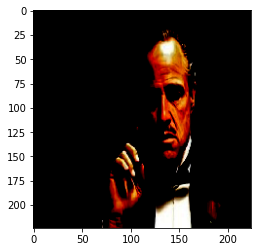

In [8]:
plt.imshow(X[10])

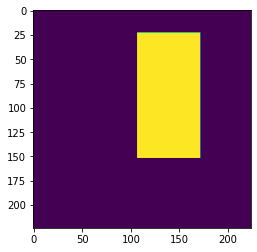

In [10]:
plt.imshow(masks[10].squeeze())

In [11]:
print(X.shape)
print(masks.shape)

(409, 224, 224, 3)
(409, 224, 224)


In [12]:
#Taking 1st 400 inputs as Training Data
X_train = X[:400,:,:]
y_train = masks[:400,:,:]

In [13]:
#Taking last 9 inputs as Testing Data
X_test = X[400:,:,:]
y_test = masks[400:,:,:]

In [14]:
#Splitting Training dataset for Training & Validation
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, test_size=0.15, random_state=42)

[[[ 0.38823533  0.27058828  0.10588241]
  [ 0.34901965  0.23137259  0.082353  ]
  [ 0.34901965  0.22352946  0.10588241]
  ...
  [ 0.48235297  0.44313729  0.12941182]
  [ 0.51372552  0.41960788  0.14509809]
  [ 0.56078434  0.45882356  0.19215691]]

 [[ 0.37254906  0.25490201  0.09019613]
  [ 0.30980396  0.19215691  0.04313731]
  [ 0.32549024  0.20000005  0.082353  ]
  ...
  [ 0.49019611  0.45098042  0.13725495]
  [ 0.53725493  0.43529415  0.1686275 ]
  [ 0.58431375  0.48235297  0.21568632]]

 [[ 0.36470592  0.24705887  0.082353  ]
  [ 0.29411769  0.1686275   0.02745104]
  [ 0.30980396  0.18431377  0.05882359]
  ...
  [ 0.49803925  0.45882356  0.14509809]
  [ 0.57647061  0.47450984  0.20784318]
  [ 0.6156863   0.51372552  0.24705887]]

 ...

 [[-0.92941177 -0.92156863 -0.97647059]
  [-0.78823531 -0.84313726 -0.89019608]
  [-0.82745099 -0.89803922 -0.93725491]
  ...
  [-0.81960785 -0.89803922 -0.97647059]
  [-0.93725491 -0.94509804 -0.96078432]
  [-0.96862745 -0.96862745 -0.97647059]]

 [

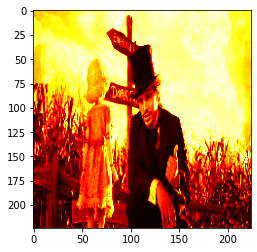

In [15]:
plt.imshow(X_train[10, ..., 0], cmap='hot')
print(X_train[10])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


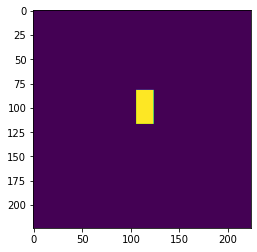

In [16]:
print(y_train[10])
plt.imshow(y_train[10].squeeze())

In [17]:
print(X_train.shape)
print(y_train.shape)

(340, 224, 224, 3)
(340, 224, 224)


In [18]:
print(X_valid.shape)
print(y_valid.shape)

(60, 224, 224, 3)
(60, 224, 224)


In [19]:
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.layers import Reshape, UpSampling2D, Concatenate, Conv2D, Input
from tensorflow.keras.models import Model

def create_model(trainable=True):
    base_model = MobileNet(input_shape=(IMAGE_HEIGHT, IMAGE_WIDTH, 3), include_top=False, alpha=1.0, weights="imagenet")

    for layer in base_model.layers:
        layer.trainable = trainable

    block0 = base_model.get_layer("conv_pw_1_relu").output 
    block = base_model.get_layer("conv_pw_1_relu").output
    block1 = base_model.get_layer("conv_pw_3_relu").output
    block2 = base_model.get_layer("conv_pw_5_relu").output
    block3 = base_model.get_layer("conv_pw_11_relu").output
    block4 = base_model.get_layer("conv_pw_13_relu").output

    x = Concatenate()([UpSampling2D()(block4), block3])
    x = Concatenate()([UpSampling2D()(x), block2])
    x = Concatenate()([UpSampling2D()(x), block1])
    x = Concatenate()([UpSampling2D()(x), block])
    x = UpSampling2D()(x)
    x = Conv2D(1, kernel_size=1, activation="sigmoid")(x)
    x = Reshape((IMAGE_HEIGHT, IMAGE_WIDTH))(x)

    return Model(inputs=base_model.input, outputs=x)

In [20]:
model = create_model(False)

In [21]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 32) 128         conv1[0][0]                      
__________________________________________________________________________________________________
conv1_relu (ReLU)               (None, 112, 112, 32) 0           conv1_bn[0][0]                   
______________________________________________________________________________________________

In [22]:
def dice_coefficient(y_true, y_pred):
    numerator = 2 * tf.reduce_sum(y_true * y_pred)
    denominator = tf.reduce_sum(y_true + y_pred)

    return numerator / (denominator + tf.keras.backend.epsilon())

In [23]:
def loss(y_true, y_pred):
    return binary_crossentropy(y_true, y_pred) - tf.math.log(dice_coefficient(y_true, y_pred) + tf.keras.backend.epsilon())

In [24]:
import tensorflow as tf
from keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
# compile model
model.compile(optimizer='Adam', loss=loss, metrics=[dice_coefficient])

In [25]:
checkpoint = tf.keras.callbacks.ModelCheckpoint('model-bestloss.h5', 
                                                monitor='dice_coefficient', 
                                                save_best_only=True,
                                                save_weights_only=True, 
                                                mode='auto', 
                                                save_freq=1)
stop = tf.keras.callbacks.EarlyStopping(monitor='dice_coefficient', patience=10, mode='auto')
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='dice_coefficient', factor=0.2, patience=5, min_lr=1e-6, verbose=1, mode='auto')

In [26]:
history = model.fit(X_train,y_train,
                    batch_size=1,
                    epochs=10,
                    callbacks=[checkpoint, reduce_lr, stop],
                    validation_data=(X_valid, y_valid),
                    shuffle=True,
                    verbose=1)

Epoch 1/10
340/340 [==============================] - 22s 55ms/step - loss: 1.5262 - dice_coefficient: 0.3929 - val_loss: 0.9191 - val_dice_coefficient: 0.5442
Epoch 2/10
340/340 [==============================] - 15s 44ms/step - loss: 0.8414 - dice_coefficient: 0.5903 - val_loss: 0.8412 - val_dice_coefficient: 0.5632
Epoch 3/10
340/340 [==============================] - 15s 44ms/step - loss: 0.7658 - dice_coefficient: 0.6135 - val_loss: 0.8271 - val_dice_coefficient: 0.5723
Epoch 4/10
340/340 [==============================] - 15s 44ms/step - loss: 0.7731 - dice_coefficient: 0.6074 - val_loss: 0.8273 - val_dice_coefficient: 0.5727
Epoch 5/10
340/340 [==============================] - 15s 44ms/step - loss: 0.9581 - dice_coefficient: 0.6076 - val_loss: 0.8945 - val_dice_coefficient: 0.5495
Epoch 6/10
340/340 [==============================] - 15s 44ms/step - loss: 0.7788 - dice_coefficient: 0.6378 - val_loss: 0.8591 - val_dice_coefficient: 0.5638

Epoch 00006: ReduceLROnPlateau reducing

In [27]:
model.evaluate(X_valid, y_valid, batch_size=1, verbose=1)

60/60 [==============================] - 2s 27ms/step - loss: 0.8202 - dice_coefficient: 0.5724


[0.8202065825462341, 0.5724216103553772]

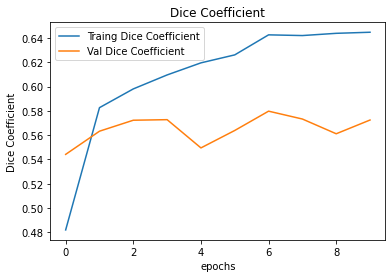

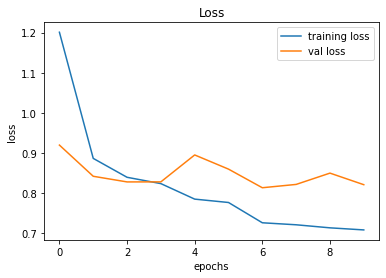

In [28]:
plt.figure(0)
plt.plot(history.history['dice_coefficient'], label='Traing Dice Coefficient')
plt.plot(history.history['val_dice_coefficient'], label='Val Dice Coefficient')
plt.title('Dice Coefficient')
plt.xlabel('epochs')
plt.ylabel('Dice Coefficient')
plt.legend()

plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [32]:
def plot_sample(X, y, ix=None):
    if ix is None:
        ix = np.random.randint(0, len(X))

    has_mask = y[ix].max() > 0

    fig, ax = plt.subplots(1, 3, figsize=(20, 10))
    ax[0].imshow(X[ix, ..., 0], cmap='hot')
    if has_mask:
        ax[0].contour(y[ix].squeeze())
    ax[0].set_title('Image')

    ax[1].imshow(y[ix].squeeze())
    ax[1].set_title('Actual Mask')

    preds = model.predict(X,batch_size=1,verbose=1)
    ax[2].imshow(preds[ix].squeeze())
    if has_mask:
        ax[2].contour(preds[ix].squeeze(), colors='k', levels=[0.5])
    ax[2].set_title('Predicted Mask')
    

9/9 [==============================] - 1s 29ms/step


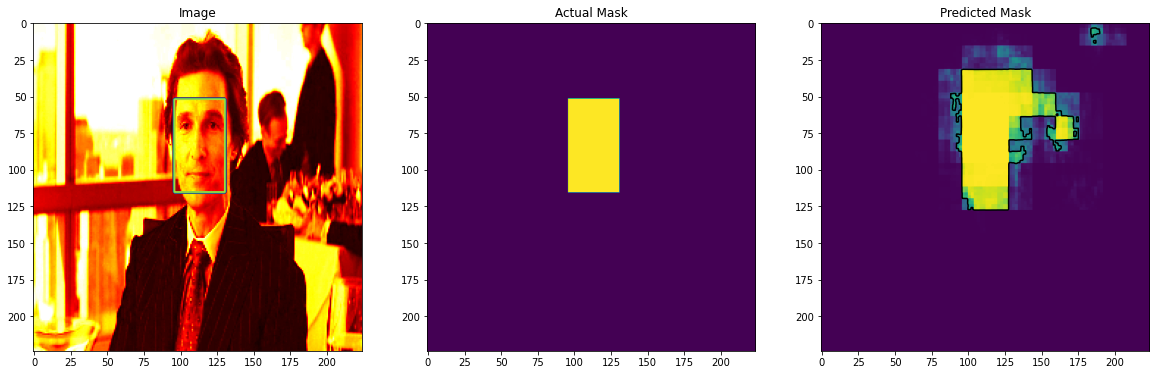

In [33]:
# Printing Test Image, Original Mask & Predicted Mask associated with the Test Image
plot_sample(X_test, y_test)